In [4]:
import matplotlib.pyplot as plt
import numpy as np

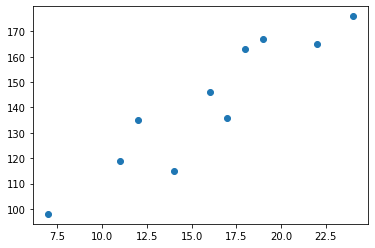

In [5]:
X = [12,14,16,19,22,24,7,17,18,11]
Y = [135, 115, 146, 167, 165, 176, 98, 136, 163, 119]

plt.scatter(X,Y)
plt.show()

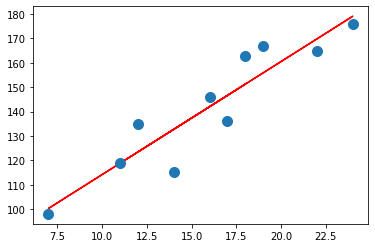

In [10]:
X = np.asarray(X)
Y = np.asarray(Y)
A = np.vstack([X, np.ones(len(X))]).T
m, c = np.linalg.lstsq(A, Y, rcond=None)[0]
plt.plot(X, m*X + c, 'r', label='Fitted line')
plt.plot(X, Y, 'o', markersize=10)
plt.show()

In [12]:
import statistics

sample = [0,1,2] 
print("Variance of sample set is % s" 
      %(statistics.variance(sample))) 

Variance of sample set is 1


In [14]:
def calc_Expectation(a): 
    prb = 0.1
    prb2 = 0.6
    prb3 = 0.3
    sum1 = (a[0] * prb)
    sum2 = (a[1] * prb2)
    sum3 = (a[2] * prb3)
    sum_all = sum1 + sum2 + sum3
    return float(sum_all) 
   
a = [0,1,2] 
  
expect = calc_Expectation(a) 
print( "Expectation of array E(X) is : ", 
                                 expect ) 

Expectation of array E(X) is :  1.2


In [16]:
a = [0,1,2]
np.cumsum(a)

array([0, 1, 3])

In [21]:
import numpy as np
import csv
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def euclidean_distance(point, center):
    return np.sqrt(np.sum((point - center)**2))

def label_cluster(distance, point, center):
    minimum = min(distance, key=distance.get)
    return [minimum, point, center[minimum]]

def new_center(cluster_label, center):
    return np.array(cluster_label + center)/2

def create_center():
    center = []
    center.append([0, 0])
    return np.array(center)

def k_means(point, center, iteration = 100):
    label = []
    cluster = []
    
    for i in range(0, iteration):
        for j in range(0, len(point)):
            distance = {}
            for l in range(0, len(center)):
                distance[l] = euclidean_distance(point[j], center[l])
            label = label_cluster(distance, point[j], center)
            center[label[0]] = new_center(label[1], center[label[0]])
            if i == (iteration - 1):
                cluster.append(label)
    return [cluster, center]

def print_data(data_points):
    print("k-Means Clustering Algorithm:")
    for intergrate in data_points[0]:
        print("Point:", intergrate[1])
        print("Cluster:", intergrate[0],"\n")
    print("Center Point:", data_points[1],"\n")
    
    
def get_data():
    data = []
    data.append([1,5])
    data.append([1,3])
    data.append([0,4])
    data.append([0,4])
    data.append([5,1])
    data.append([6,2])
    data.append([4,0])
    data = np.asarray(data)
    print(data)
    center = create_center()
    [cluster, new_center] = k_means(data, center, iteration = 100)
    print_data([cluster, new_center])
    
get_data()

[[1 5]
 [1 3]
 [0 4]
 [0 4]
 [5 1]
 [6 2]
 [4 0]]
k-Means Clustering Algorithm:
Point: [1 5]
Cluster: 0 

Point: [1 3]
Cluster: 0 

Point: [0 4]
Cluster: 0 

Point: [0 4]
Cluster: 0 

Point: [5 1]
Cluster: 0 

Point: [6 2]
Cluster: 0 

Point: [4 0]
Cluster: 0 

Center Point: [[4 1]] 



In [23]:
from scipy import spatial

np.random.seed(0)
n_centroids = 1000
centroids = np.random.rand(n_centroids, 2)
cluster_sizes = np.random.randint(1, 1000, size=n_centroids)

print(centroids)

[[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 ...
 [0.41443887 0.79128155]
 [0.72119811 0.48010781]
 [0.64386404 0.50177313]]


In [24]:
labels = np.repeat(np.arange(n_centroids), cluster_sizes) + 1
points = np.zeros((cluster_sizes.sum(), 2))
points[:,0] = np.repeat(centroids[:,0], cluster_sizes)
points[:,1] = np.repeat(centroids[:,1], cluster_sizes)
points += 0.05 * np.random.randn(cluster_sizes.sum(), 2)